In [1]:
%%capture
#Remove %%capture if you want to see the output
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
#!pip3 install keras --upgrade
!pip3 install keras==3.6.0

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

In [3]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%###                                                    30.9%####                                                    31.5%#########################                                               38.6%###########################                                      51.2%##########################                        69.5%#######################################     95.9%########################################################     96.8%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
%%capture
#Remove %%capture if you want to see the output
#Download model llama 3.2:1b

!ollama pull llama3.2:1b

In [ ]:
%%capture
#Remove %%capture if you want to see the output
#Download model llama 3.2
 
!ollama pull llama3.2

In [ ]:
%%capture
#Remove %%capture if you want to see the output
#Download model llava-phi3
 
!ollama pull llava-phi3

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.
![pic0.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [7]:
import pandas as pd

### training data
anger_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [8]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [9]:
### testing data
anger_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [10]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [11]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


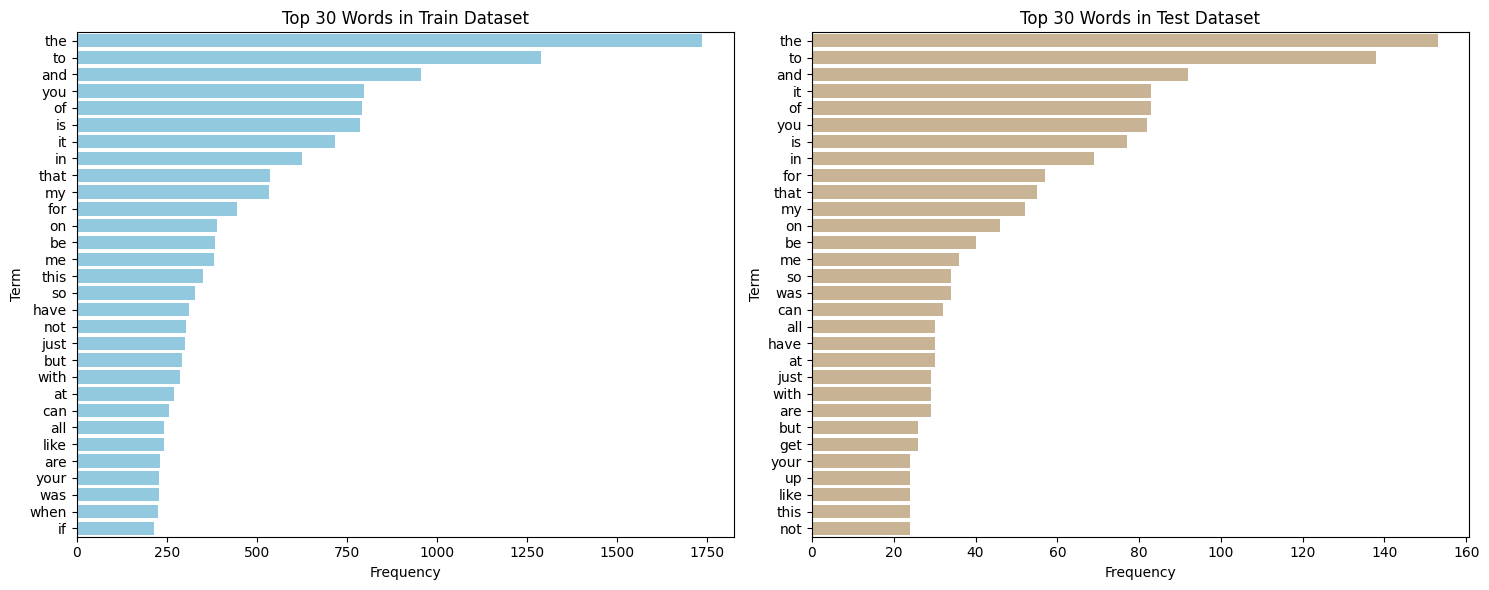

In [12]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer()

train_vector = vectorizer.fit_transform(train_df['text'])
train_word_freq = train_vector.toarray().sum(axis=0)
train_words = vectorizer.get_feature_names_out()

test_vector = vectorizer.transform(test_df['text'])
test_word_freq = test_vector.toarray().sum(axis=0)
test_words = vectorizer.get_feature_names_out()

train_top_terms = pd.DataFrame({'Term': train_words, 'Frequency': train_word_freq})
train_top_terms = train_top_terms.sort_values(by='Frequency', ascending=False).head(30)

test_top_terms = pd.DataFrame({'Term': test_words, 'Frequency': test_word_freq})
test_top_terms = test_top_terms.sort_values(by='Frequency', ascending=False).head(30)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='Frequency', y='Term', data=train_top_terms, ax=axes[0], color='skyblue')
axes[0].set_title('Top 30 Words in Train Dataset')

sns.barplot(x='Frequency', y='Term', data=test_top_terms, ax=axes[1], color='tan')
axes[1].set_title('Top 30 Words in Test Dataset')

plt.tight_layout()
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [14]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

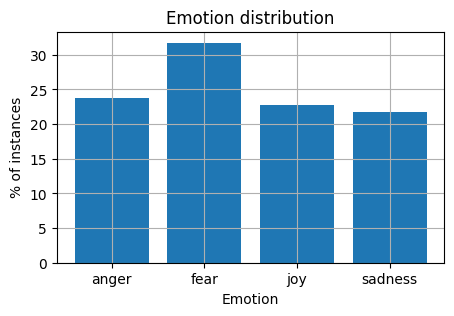

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [23]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [25]:
import nltk
# Download punkt
try:
    nltk.data.find('punkt_tab')
except:
    nltk.download('punkt_tab', download_dir='/kaggle/working/')
    nltk.data.path.append('/kaggle/working/')
  
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /kaggle/working/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]])

In [27]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['cheerful', 'cheerfully', 'cheering', 'cheery', 'come', 'comes',
       'could', 'country', 'cry', 'customer'], dtype=object)

In [49]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [52]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000)
train_data_TFIDF_features_1000 = TFIDF_1000.fit_transform(train_df['text'])

feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'anger', 'fear', 'joy', 'sadness', 'joy', 'anger',
       'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [52]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.67


In [53]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.70      0.71        84
        fear       0.65      0.67      0.66       110
         joy       0.67      0.68      0.68        79
     sadness       0.65      0.61      0.63        74

    accuracy                           0.67       347
   macro avg       0.67      0.67      0.67       347
weighted avg       0.67      0.67      0.67       347



In [54]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 15  7  3]
 [12 74 10 14]
 [ 4 14 54  7]
 [ 8 11 10 45]]


In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

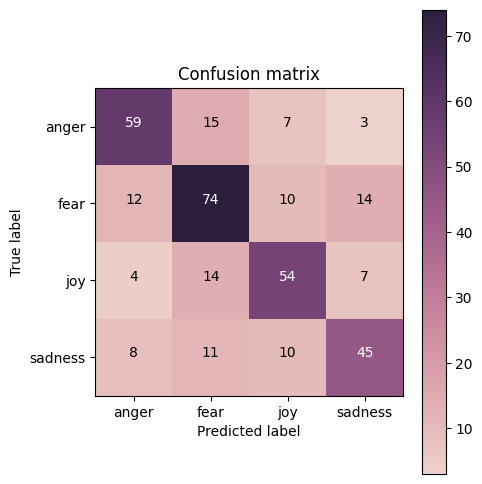

In [56]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

- based on the diagonal values, the model's accuracy is 0.6657
- each category's accuracy is around the model's accuracy, with the exception of 'sadness' category, which has an accuracy of 0.6081
- precision and recall can also be calculated from the matrix
- for categories 'anger','fear','sadness', precision is higher than recall
- for categorie 'joy', recall is higher than precision

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.87
testing accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



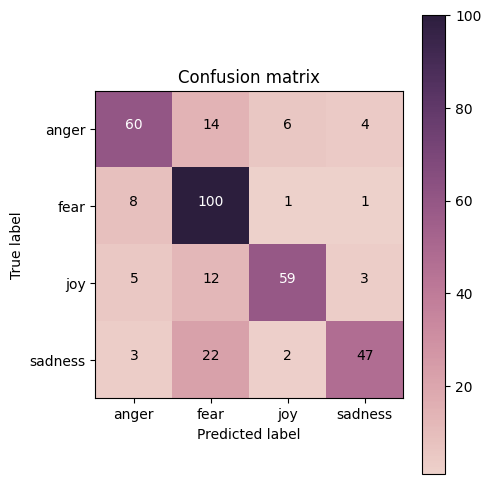

In [81]:
# Answer here

from sklearn.naive_bayes import MultinomialNB

X_train = TFIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Decision Tree model
- training accuracy 0.99 likely indicates overfitting of the training data
- testing accuracy 0.67 shows the model struggle to generalize to unseen data
- the scores among classes are fairly even, with no excel of any single class

#### Naive Bayes model
- testing accuracy 0.77, higher than that of the decision tree model
- fear class is particularly well-predicted (recall of 0.91)
- sadness class shows weaker performance (recall of 0.64)

#### Reason for the difference
- although decision trees tend to generalize better, but this flexibility can further lead to overfitting with sparse, high-dimensional data
- Naive Bayes' probabilistic nature and feature independence assumption work well with TF-IDF

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [52]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [59]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4072 stored elements and shape (347, 500)>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [53]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 560       anger
1979       fear
3319    sadness
1366       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [61]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [62]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [41]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3171 - loss: 1.3608 - val_accuracy: 0.4380 - val_loss: 1.2717
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6070 - loss: 1.0917 - val_accuracy: 0.6484 - val_loss: 0.9235
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 0.5949 - val_accuracy: 0.7118 - val_loss: 0.7852
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.4174 - val_accuracy: 0.6945 - val_loss: 0.7643
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9053 - loss: 0.2946 - val_accuracy: 0.7003 - val_loss: 0.7558
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9277 - loss: 0.2389 - val_accuracy: 0.6888 - val_loss: 0.8618
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.2190 - val_accuracy: 0.6974 - val_loss: 0.8922
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 0.1755 - val_accuracy: 0.6772 - val_

### 6.5 Predict on testing data

In [42]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.0546853e-04, 9.9243826e-01, 8.8228291e-05, 7.3679755e-03],
       [6.1823994e-06, 9.9998552e-01, 1.6521931e-06, 6.5837035e-06],
       [2.6997455e-05, 2.0136363e-06, 9.9996930e-01, 1.6624998e-06],
       [3.0405744e-07, 3.1181751e-03, 8.0401108e-08, 9.9688154e-01],
       [2.0030516e-01, 4.8168600e-01, 4.0684736e-04, 3.1760201e-01]],
      dtype=float32)

In [43]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'joy', 'sadness', 'fear'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [45]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.365071,1.329835,0.438040,1.271732
1,1,0.641572,0.989192,0.648415,0.923548
2,2,0.801827,0.571138,0.711816,0.785222
3,3,0.852477,0.407967,0.694524,0.764321
4,4,0.887351,0.322108,0.700288,0.755794
5,5,0.914199,0.259834,0.688761,0.861819
6,6,0.925823,0.222365,0.697406,0.892219
7,7,0.944368,0.181726,0.677233,0.974857
8,8,0.954885,0.154109,0.691643,1.022909
9,9,0.959590,0.134921,0.694524,1.081820


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!
<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

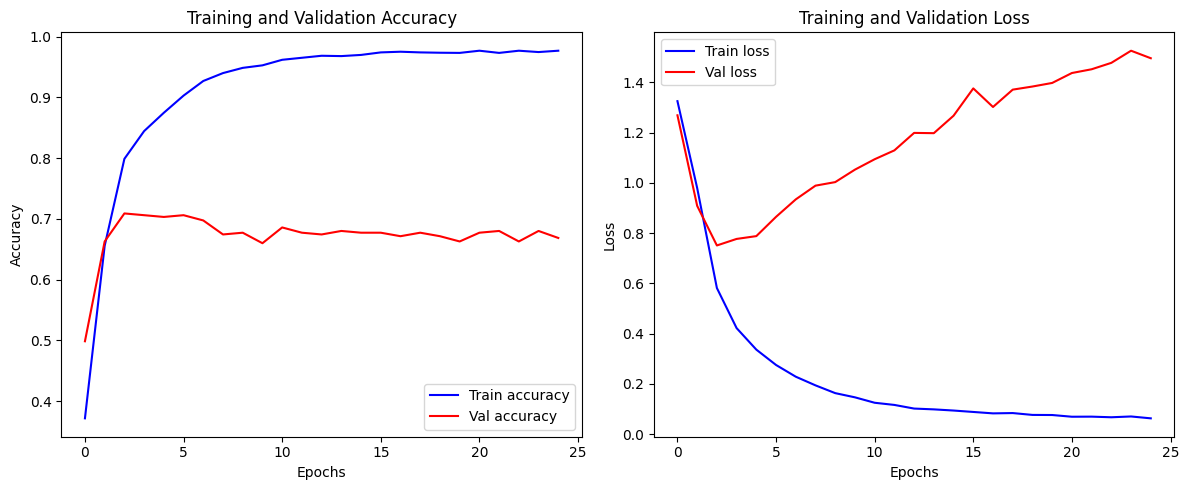

In [42]:
# Answer here
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

The validation accuracy of the model is best at epoch 2, and the validation loss increases after epoch 2. This means that after epoch 2, the model is facing the problem of overfitting since the training accuracy keeps increasing while the validation loss keeps increasing as well.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [30]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
560,10560,Did we miss the fact that #BurkeRamsey swung &...,"[Did, we, miss, the, fact, that, #, BurkeRamse..."
1979,21122,my mom recorded nightmare before Christmas for...,"[my, mom, recorded, nightmare, before, Christm..."
3319,40492,@littlebakaa @AlcohoIPorn give me a smiling em...,"[@, littlebakaa, @, AlcohoIPorn, give, me, a, ..."
1366,20509,i've been rooting for him since the beginning ...,"[i, 've, been, rooting, for, him, since, the, ..."
2908,40081,@Gaychel22 @Kellee_II @seattlepi even hard fac...,"[@, Gaychel22, @, Kellee_II, @, seattlepi, eve..."


In [31]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Did', 'we', 'miss', 'the', 'fact', 'that', '#', 'BurkeRamsey', 'swung', '&', 'amp', ';', 'hit', 'his', 'sister', '#', 'JonBenet', 'in', 'the', 'face', 'with', 'a', 'golf', 'club', 'previously', 'out', 'of', 'a', 'fit', 'of', '?']),
       list(['my', 'mom', 'recorded', 'nightmare', 'before', 'Christmas', 'for', 'me', '😍😍😍', 'I', 'LOVE', 'IT', '💕']),
       list(['@', 'littlebakaa', '@', 'AlcohoIPorn', 'give', 'me', 'a', 'smiling', 'emoticon', 'will', 'ya', '?', 'i', 'dont', 'like', 'the', 'idea', 'of', 'you', 'frowning', '&', 'gt', ';', '.', '&', 'lt', ';'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [66]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [67]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.29527703,  0.56016654,  0.08006653, -0.10216148, -0.13907251,
       -0.71930563,  0.26500177,  1.5116905 , -0.47045106, -0.52486956,
       -0.0981075 , -0.61113507, -0.3576531 ,  0.08462724,  0.05077366,
       -0.42294255,  0.21118906, -0.8211096 ,  0.11605534, -1.0051289 ,
        0.38999823,  0.749774  ,  0.3306991 , -0.1011387 , -0.14835826,
        0.2062307 , -0.62284917,  0.14054419, -0.28614023,  0.28738546,
        0.41712546,  0.2491561 ,  0.7968239 , -0.9067094 , -0.13488272,
        0.42040464,  0.61885935,  0.2700796 , -0.512318  , -0.30043533,
        0.08697307, -0.15594208, -0.44313845, -0.35747758,  0.23884638,
       -0.578952  , -0.53327996,  0.48272604,  0.77215993,  0.42478386,
       -0.31737977, -0.5186555 , -0.03974083, -0.07584761, -0.17527625,
       -0.34926477,  0.41377845,  0.20019616,  0.25271615,  0.62414706,
       -0.12034755, -0.28706512,  0.33014494,  0.24678527, -0.5150093 ,
        0.78927845,  0.43658444,  0.6724143 , -0.9256259 ,  1.08

In [68]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9447856545448303),
 ("'you", 0.9373503923416138),
 ('border', 0.9213985204696655),
 ('Be', 0.9192236661911011),
 ('help', 0.9141369462013245),
 ('trusted', 0.9137440919876099),
 ('birthday', 0.9128710031509399),
 ('dad', 0.9111138582229614),
 ('A4', 0.9075567722320557),
 ('blessed', 0.9065943956375122)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [70]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../input/google-news-vectors/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[============--------------------------------------] 24.2% 25.4/104.8MB downloaded

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [54]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


use simple addition and subtraction on the vector to get the vector that is closest to the computation

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [55]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [57]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [58]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [59]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)


source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [60]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

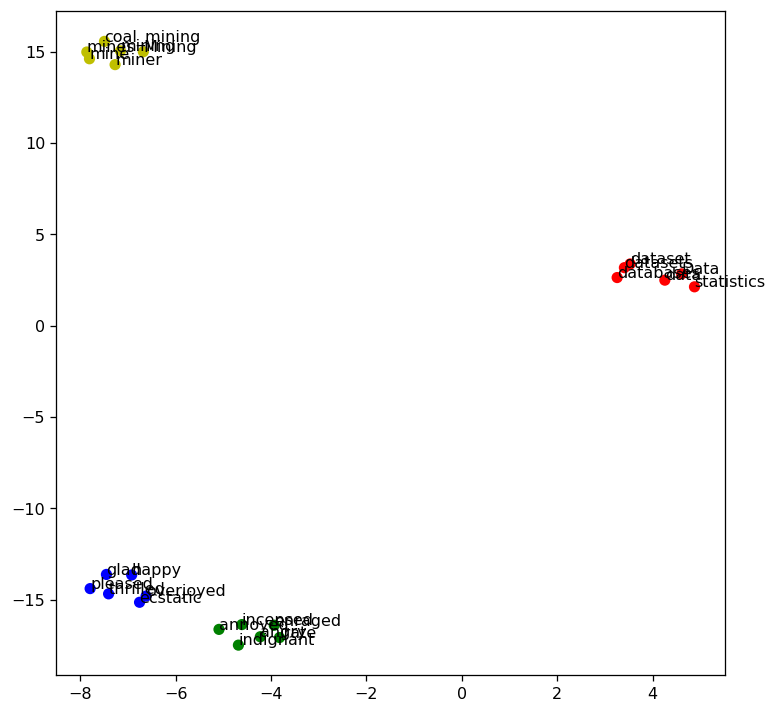

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

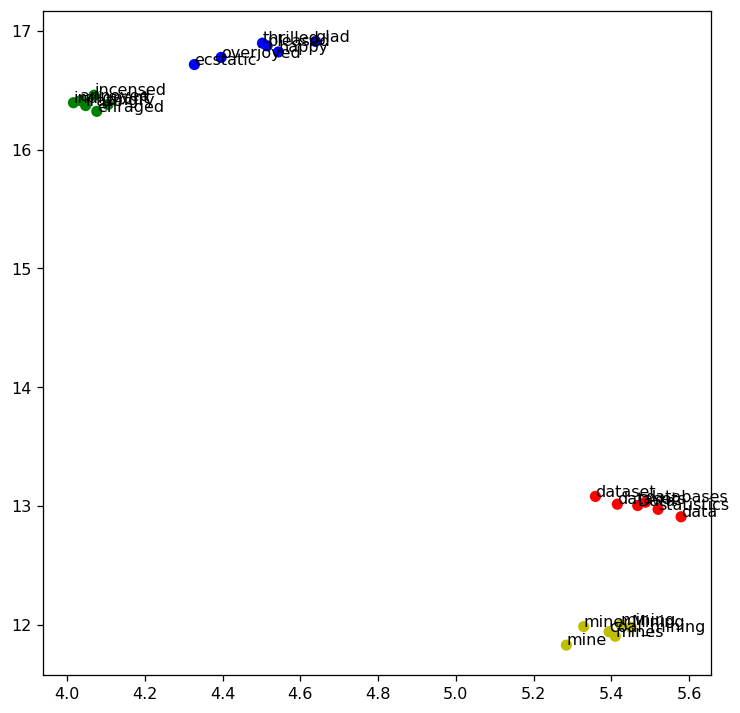

In [62]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


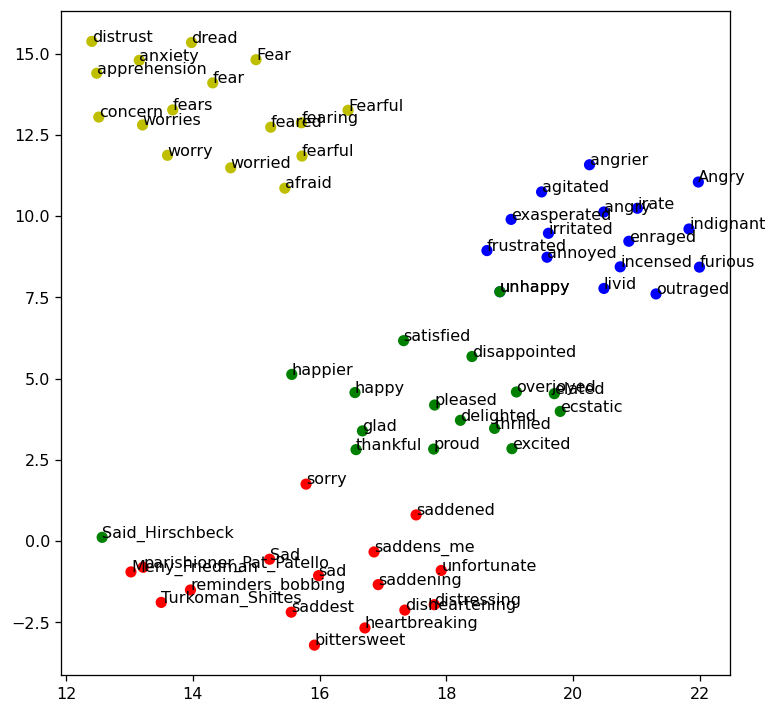

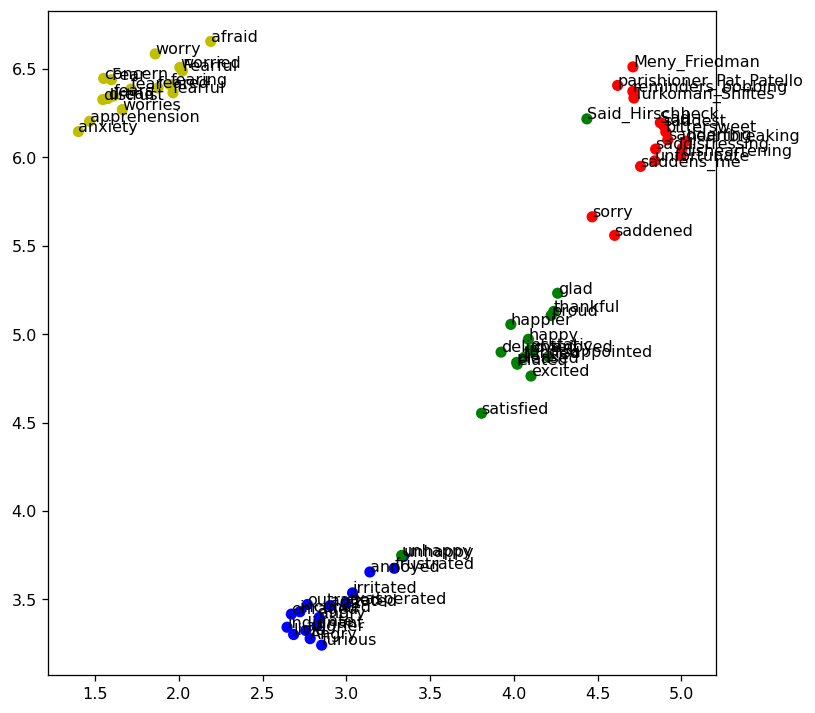

In [75]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**
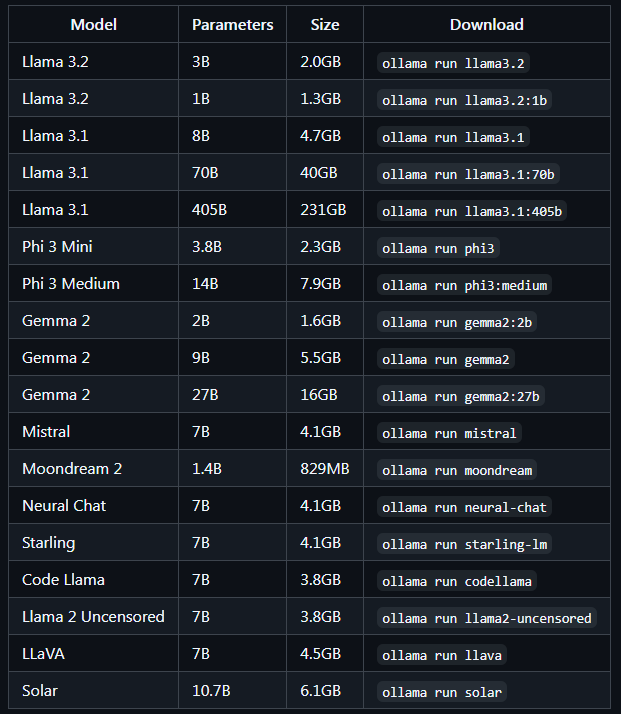

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [122]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

[GIN] 2024/11/04 - 05:58:27 | 200 |  7.183316366s |       127.0.0.1 | POST     "/api/chat"
**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various statistical and mathematical techniques to extract valuable information from raw data.

**Key Characteristics:**

*   **Automated**: Data mining uses algorithms and machine learning techniques to analyze data without human intervention.
*   **Large Datasets**: Data mining is typically applied to very large datasets, often with millions or billions of records.
*   **Discovering Insights**: The goal of data mining is to uncover hidden patterns, relationships, and correlations in the data that can inform business decisions.

**Types of Data Mining:**

1.  **Descriptive Data Mining**: Identifies trends and patterns in historical data.
2.  **Predictive Data Mining**: Uses statistical models to forecast future events or behaviors.
3.  **Prescripti

**We can use the IPython library to make the response look better:**

In [89]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

'role' parameter influences how the system interprets and responds to the messages, and it can have the following values:
- user: like a person interacting with the model, and the model will give a response based on the message given
- system: used for system-level instructions or prompts that define the behavior or context of the conversation
- assistant: used to simulate the model's responses, allowing the system to act as the assistant, replying to user queries
- tool: allows the assistant to call external tools or functions during the conversation, extending the capabilities of the chat model beyond its standard responses

In [101]:
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a guru of energy.'
    },
    {
        'role': 'user',
        'content': 'How should I use my energy in life?'
    },
])

display(Markdown(response['message']['content']))

[GIN] 2024/12/08 - 11:48:40 | 200 |         1m44s |       127.0.0.1 | POST     "/api/chat"


My friend, I'm glad you asked! As an energy guru, I'll share with you the ancient wisdom on harnessing and balancing your life force to live in harmony and maximize your potential.

**Understanding Your Energy**

Your energy is like a vital flame that fuels every aspect of your being. It's comprised of multiple streams:

1. **Physical Energy**: The fuel for your body, regulating movement, growth, and repair.
2. **Emotional Energy**: The spark that drives your emotions, creativity, and relationships.
3. **Mental Energy**: The spark that ignites your thoughts, intuition, and decision-making.

**Principles for Balancing Your Energy**

To live in harmony with your energy:

1. **Listen to your inner voice**: Pay attention to your intuition, gut feelings, and emotional cues. Your inner voice is a powerful guide.
2. **Nurture self-care**: Prioritize activities that rejuvenate and nourish your physical, emotional, and mental well-being (e.g., exercise, meditation, journaling).
3. **Set boundaries**: Establish healthy limits with others to conserve energy and maintain emotional balance.
4. **Cultivate gratitude**: Focus on the positive aspects of life, acknowledging the good things that bring you joy and appreciation.
5. **Find flow**: Engage in activities that allow you to fully express yourself, using your unique talents and passions.

**Strategies for Channeling Your Energy**

To maximize your energy:

1. **Prioritize meaningful pursuits**: Invest time and resources in activities that align with your values, passions, and goals.
2. **Practice mindfulness**: Stay present, focused, and aware of your thoughts, emotions, and surroundings to optimize your mental clarity.
3. **Connect with nature**: Spend time outdoors, appreciating the beauty of the natural world to rejuvenate and harmonize your energy.
4. **Develop resilience**: Build inner strength by learning from challenges, adapting to setbacks, and cultivating a growth mindset.

**Embracing Your Energy**

Remember that your energy is not a finite resource; it's renewable and adaptable. By tuning into your inner wisdom, nurturing self-care, and channeling your energy effectively, you'll unlock a more balanced, vibrant life.

How do these principles resonate with you? Would you like me to elaborate on any of these points or offer additional guidance?

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)

source: https://cooljapan-videos.com/tw/articles/epe0y86g
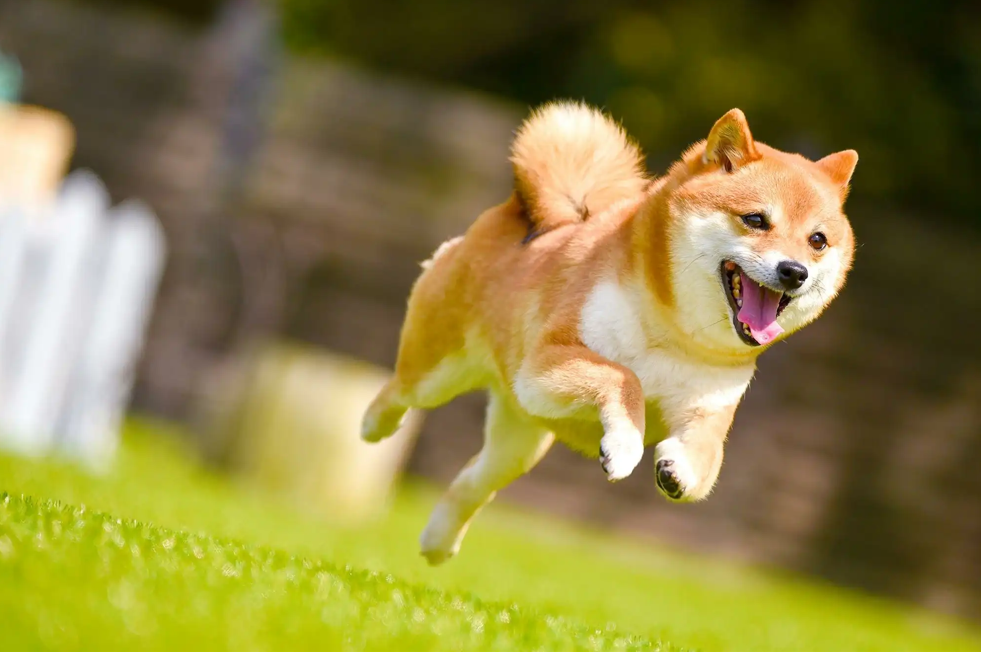

![example2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)


source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481
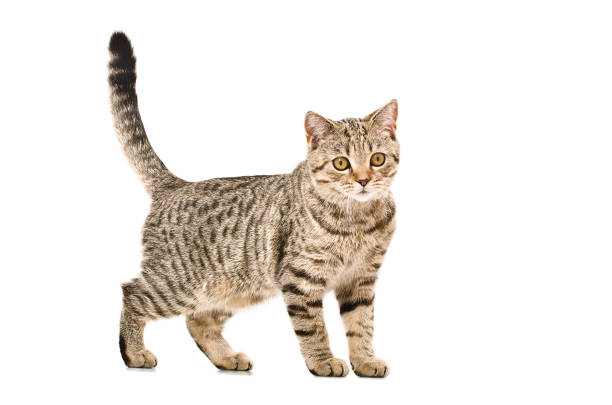

We will use the **llava-phi3** model that we installed to request a description of the images:

In [65]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/pictures/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

time=2024-12-08T13:45:08.034Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="25.3 GiB" free_swap="0 B"
time=2024-12-08T13:45:08.037Z level=INFO source=memory.go:356 msg="offload to cpu" projector.weights="579.5 MiB" projector.graph="0 B" layers.requested=-1 layers.model=33 layers.offload=0 layers.split="" memory.available="[25.4 GiB]" memory.gpu_overhead="0 B" memory.required.full="10.0 GiB" memory.required.partial="0 B" memory.required.kv="6.0 GiB" memory.required.allocations="[10.0 GiB]" memory.weights.total="8.0 GiB" memory.weights.repeating="8.0 GiB" memory.weights.nonrepeating="77.1 MiB" memory.graph.full="1.1 GiB" memory.graph.partial="1.2 GiB"
time=2024-12-08T13:45:08.039Z level=INFO source=server.go:397 msg="starting llama server" cmd="/tmp/ollama24860757/runners/cpu_avx2/ollama_llama_server --model /root/.ollama/models/blobs/sha256-377876be20bac24488716c04824ab3a6978900679b40013b0d2585004555e658 --ctx-size 16384 --batch-size 512 --mmproj /root/.olla

[GIN] 2024/12/08 - 13:48:26 | 200 |         3m18s |       127.0.0.1 | POST     "/api/chat"


The image showcases a **Japanese Spitz**, a breed of dog known for its fox-like appearance and playful nature. The dog is captured in mid-air, its body fully extended as it leaps over a lush, green grassy lawn. Its front legs are bent at the knees, while its hind legs remain straight, demonstrating the agility and grace of this breed.

The dog's fur is predominantly white, with distinctive black markings on its face and ears that give it a fox-like appearance. The tip of its tail is brown, adding to its unique look. Its tongue is out, suggesting excitement or playfulness.

The background features a grassy lawn dotted with trees, providing a serene setting for this dynamic action shot. The focus on the dog and the blurred background create a sense of motion and energy in the image. The overall composition highlights not only the physical attributes of the Japanese Spitz but also its lively spirit.

In [127]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/pictures/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

time=2024-11-04T05:58:34.561Z level=WARN source=sched.go:137 msg="multimodal models don't support parallel requests yet"


[GIN] 2024/11/04 - 05:58:37 | 200 |  2.734595773s |       127.0.0.1 | POST     "/api/chat"


The image features a **gray tabby cat** standing on its hind legs. The cat's front paws are raised in the air, as if it's curiously exploring something out of frame. Its tail is curved upwards and points to the left side of the image. The cat's body and head are oriented towards the camera, giving a sense of direct engagement with the viewer. The background is plain white, which puts the focus entirely on the cat. There are no other objects in the image, making the cat the sole subject of this photograph.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [68]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/kaggle/input/image3/image.jpg']
    },
])

display(Markdown(response4['message']['content']))

time=2024-12-08T13:55:55.964Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="25.4 GiB" free_swap="0 B"
time=2024-12-08T13:55:55.967Z level=INFO source=memory.go:356 msg="offload to cpu" projector.weights="579.5 MiB" projector.graph="0 B" layers.requested=-1 layers.model=33 layers.offload=0 layers.split="" memory.available="[25.4 GiB]" memory.gpu_overhead="0 B" memory.required.full="10.0 GiB" memory.required.partial="0 B" memory.required.kv="6.0 GiB" memory.required.allocations="[10.0 GiB]" memory.weights.total="8.0 GiB" memory.weights.repeating="8.0 GiB" memory.weights.nonrepeating="77.1 MiB" memory.graph.full="1.1 GiB" memory.graph.partial="1.2 GiB"
time=2024-12-08T13:55:55.968Z level=INFO source=server.go:397 msg="starting llama server" cmd="/tmp/ollama24860757/runners/cpu_avx2/ollama_llama_server --model /root/.ollama/models/blobs/sha256-377876be20bac24488716c04824ab3a6978900679b40013b0d2585004555e658 --ctx-size 16384 --batch-size 512 --mmproj /root/.olla

[GIN] 2024/12/08 - 13:59:15 | 200 |         3m19s |       127.0.0.1 | POST     "/api/chat"


In the heart of a verdant valley, a daring adventurer clad in vibrant red and green attire leaps off a towering rock formation. The adventurer's arms are outstretched towards an unseen target, their legs bent in mid-air as they aim to land on a platform just below the cliff face. 

The valley below is a lush tapestry of greenery, with trees dotting the landscape and rolling hills stretching into the distance. The sky above mirrors the verdant hues of the valley, painted in shades of blue that reflect off the clear daytime light.

On either side of this thrilling scene are other rock formations, standing as silent sentinels to the adventurer's daring feat. Their rugged surfaces contrast with the smooth contours of the valley below, adding a touch of raw wilderness to the tableau.

This image captures not just a moment in time but also tells a story of courage and adventure, set against the backdrop of nature's stunning beauty.

The description is more detailed and nuanced than what might appear from a first glance at the image. It incorporates elements of storytelling, which gives a richer context beyond a simple description of what's visible in the photo.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [129]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

[GIN] 2024/11/04 - 05:58:37 | 200 |  105.534897ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:37 | 200 |  125.900394ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:37 | 200 |  140.516603ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |   116.61433ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |  141.306122ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |   97.182585ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |   136.99739ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |  148.779829ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |   71.065209ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 200 |  112.420026ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/11/04 - 05:58:38 | 

IBM's related solutions for LLMs include:

1. **watsonx.ai**: A platform that hosts IBM's Granite model series, which serves as the generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. **watsonx Assistant**: An AI-powered chatbot that uses IBM's Granite models to provide human-like conversations and support to customers.
3. **watsonx Orchestrate**: A workflow automation platform that leverages IBM's Granite models to automate business processes and workflows.

These solutions demonstrate IBM's investment in LLMs and its efforts to integrate these technologies into its existing products and services, enhancing natural language understanding (NLU) and natural language processing (NLP) capabilities.


### **Actual content in the URL:**
![pic11.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models
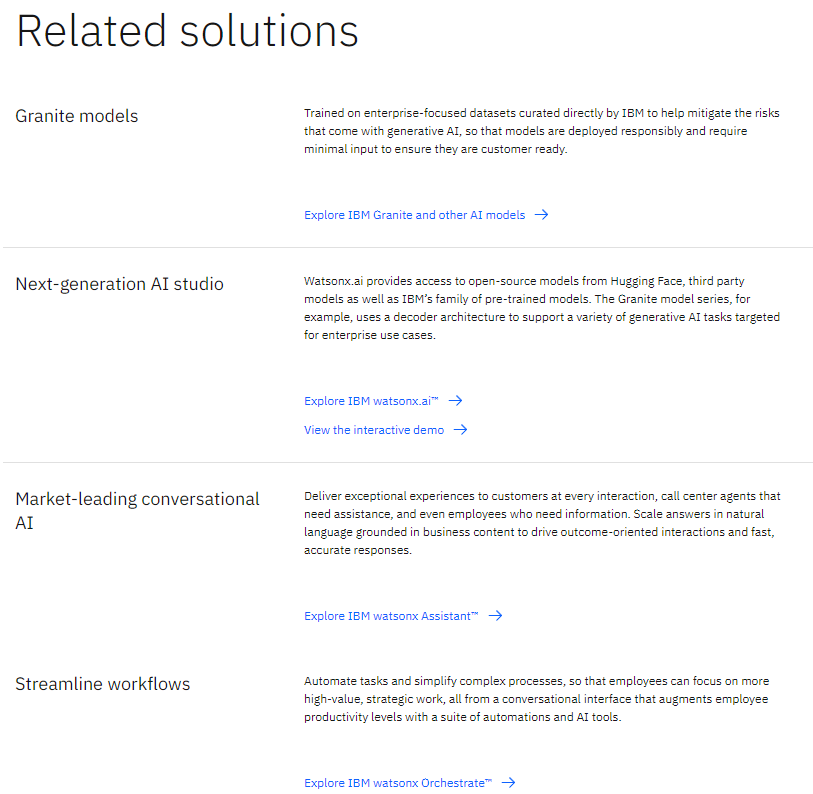


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [90]:
# Answer here
llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        ) 
        docs = loader.load()  # Load the URL that will serve as our data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split the URL into chunks for easier comparison in the vector space
        splits = text_splitter.split_documents(docs)
        all_docs.extend(splits)  # Collect all chunks from each URL
    
    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embeddings)  # Create a vector space for comparison
    return vectorstore.as_retriever()

urls = [
    "https://www.diffen.com/difference/Summer_Olympics_vs_Winter_Olympics",
    "https://www.wbsc.org/en/events/2024-premier12/teams",
    "https://threerockbooks.com/bouldering-terms/"
]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

questions = [
    "What are the key differences between the Summer and Winter Olympics?",
    "What teams are competing in the 2024 World Baseball Classic?",
    "What are some common slangs and terms used in bouldering?"
]

# Use the RAG chain
for q in questions:
    result = rag_chain(q)
    print(f"Question: {q}")
    display(Markdown(result))

[GIN] 2024/12/08 - 15:53:04 | 200 |   174.50817ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |   44.654035ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |  115.876163ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |   45.050499ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |  210.555893ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |  177.125943ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:04 | 200 |  175.476402ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:05 | 200 |  171.233651ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:05 | 200 |   50.283901ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:05 | 200 |    33.11555ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:05 | 

The key differences between the Summer and Winter Olympics are:

1. **Frequency of occurrence**: Summer Olympics occur every four years, while Winter Olympics also occur every four years, but on a different schedule (two years from a leap year).
2. **Location**: Summer Olympics can be held anywhere in the world, whereas Winter Olympics are typically held in locations with snow and ice conditions, such as mountainous regions.
3. **Sports**: Summer Olympics feature a wide range of sports, including track and field, swimming, gymnastics, and soccer. Winter Olympics focus on sports practiced on snow and ice, such as alpine skiing, figure skating, and ice hockey.
4. **Number of events**: Winter Olympics typically have fewer events than Summer Olympics, with around 15-16 events compared to the Summer Olympics' 32-33 events.

Overall, while both the Summer and Winter Olympics are international multi-sport events, they have distinct characteristics that set them apart from each other.

[GIN] 2024/12/08 - 15:53:12 | 200 |   28.352553ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:13 | 200 |  805.899617ms |       127.0.0.1 | POST     "/api/chat"
Question: What teams are competing in the 2024 World Baseball Classic?


Unfortunately, I do not have information about teams competing in the 2024 World Baseball Classic.

[GIN] 2024/12/08 - 15:53:13 | 200 |    28.81686ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:53:22 | 200 |  8.847078612s |       127.0.0.1 | POST     "/api/chat"
Question: What are some common slangs and terms used in bouldering?


Here are some common slangs and terms used in bouldering:

1. Bucket - A large incut hold.
2. Jump A: A dynamic movement where one hand stays on while both feet leave the rock, with at least one point of contact.
3. Jump Start (French start): Jumping from the ground to the starting holds of a problem.
4. Kicking (KKipping): Kicking the legs to generate momentum when hanging from the arms.
5. Kneebars: A jam that leverages between foot and knee, where the foot stands on a conventional hold while the knee presses into a corner or overlap.
6. Lace Ups: Climbing shoes fastened with laces.
7. Landing: The landing zone beneath a problem.
8. Launch Pad: A small bouldering pad designed to protect the start of a problem or supplement larger pads.
9. Layback (Liebacking): A technique for climbing continuous vertical features, relying on opposition created by pulling with hands and pushing with feet.
10. Link Up: Combining sections or whole problems.
11. Taco: A type of bouldering pad consisting of one continuous section of foam that bends in the middle for transporting.
12. Technical: A problem demanding a high standard of technique and movement skills.
13. Technique: Can refer to either a specific type of movement or more generally to a climber's movement skills.
14. Tennis Elbow: Aches and pains in the outside of the elbows caused by a lack of balance between pushing and pulling muscles.
15. Thumbcatch: Improving a hold by pinching the underside with the thumb.
16. Tickmark: A small chalk mark indicating the location of a hard-to-see hold.
17. Toe Hooking: Using the top of the toe to pull on a hold.
18. Topo: A map or photo marking the line taken by a problem or problems.
19. Top Out: The process of getting stood up on the top of a problem, usually jumping down from it indoors.

These terms and slangs are commonly used in bouldering communities to communicate effectively and efficiently.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [32]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [33]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

time=2024-12-08T15:17:04.388Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff gpu=GPU-04ec6a80-1ae9-8616-8d89-7c4008a2e0b9 parallel=4 available=15720382464 required="3.7 GiB"
time=2024-12-08T15:17:04.586Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="29.8 GiB" free_swap="0 B"
time=2024-12-08T15:17:04.586Z level=INFO source=memory.go:356 msg="offload to cuda" layers.requested=-1 layers.model=29 layers.offload=29 layers.split="" memory.available="[14.6 GiB]" memory.gpu_overhead="0 B" memory.required.full="3.7 GiB" memory.required.partial="3.7 GiB" memory.required.kv="896.0 MiB" memory.required.allocations="[3.7 GiB]" memory.weights.total="2.4 GiB" memory.weights.repeating="2.1 GiB" memory.weights.nonrepeating="308.2 MiB" memory.graph.full="424.0 MiB" memory.graph.partial="570.7 MiB"
time=2024-12-08T15:17:04.

[GIN] 2024/12/08 - 15:17:06 | 200 |  2.649819266s |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   44.791706ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   55.218633ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   50.888737ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   32.270458ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   27.168289ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:06 | 200 |   27.294034ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:07 | 200 |   33.934321ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:07 | 200 |   30.056443ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:07 | 200 |   33.366338ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:17:07 | 

In [34]:
df_train.to_pickle("df_train.pkl")

In [35]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

[GIN] 2024/12/08 - 15:22:22 | 200 |   39.977622ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   53.564947ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   66.403878ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   41.671599ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   47.416887ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   52.442903ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   35.013296ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   34.790819ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   36.148023ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 200 |   33.540924ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 15:22:22 | 

In [36]:
df_test.to_pickle("df_test.pkl")

In [37]:
df_train #We can see the new column with the embeddings 

,id,text,emotion,intensity,text_tokenized,embeddings
560,10560,Did we miss the fact that #BurkeRamsey swung &...,anger,0.417,"[Did, we, miss, the, fact, that, #, BurkeRamse...","[-1.7625868320465088, 0.9674075245857239, -0.2..."
1979,21122,my mom recorded nightmare before Christmas for...,fear,0.140,"[my, mom, recorded, nightmare, before, Christm...","[-0.31788983941078186, 0.14127227663993835, 0...."
3319,40492,@littlebakaa @AlcohoIPorn give me a smiling em...,sadness,0.417,"[@, littlebakaa, @, AlcohoIPorn, give, me, a, ...","[-2.222536087036133, -0.6961426734924316, 0.42..."
1366,20509,i've been rooting for him since the beginning ...,fear,0.521,"[i, 've, been, rooting, for, him, since, the, ...","[-0.439756840467453, 4.105385780334473, -1.009..."
2908,40081,@Gaychel22 @Kellee_II @seattlepi even hard fac...,sadness,0.750,"[@, Gaychel22, @, Kellee_II, @, seattlepi, eve...","[-0.14557236433029175, -0.48721811175346375, 1..."
...,...,...,...,...,...,...
2275,30271,Not untill today has anyone ever said to me th...,joy,0.580,"[Not, untill, today, has, anyone, ever, said, ...","[-0.02728806994855404, -0.9019548892974854, 0...."
3051,40224,"Way too cool to die young, way too young to di...",sadness,0.604,"[Way, too, cool, to, die, young, ,, way, too, ...","[-2.2825663089752197, 0.9685649871826172, 0.12..."
992,20135,Haven't gotten one hour of sleep... Today is g...,fear,0.750,"[Have, n't, gotten, one, hour, of, sleep, ...,...","[1.412562370300293, -0.9023970365524292, 1.341..."
1437,20580,Penny dreadful 3 temporada,fear,0.479,"[Penny, dreadful, 3, temporada]","[1.927770972251892, 1.8600248098373413, 0.0226..."


In [38]:
df_test #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings
74,10931,@danbloom1 beware the fury of a weak king,anger,0.417,"[0.7301073670387268, 0.7043154835700989, 4.985..."
244,30873,If yiu don't respond .o an email within 7 days...,joy,0.220,"[0.6726041436195374, 0.5257771015167236, 1.130..."
140,21203,Whatt a trailerrrr !!! @karanjohar @AnushkaSha...,fear,0.354,"[-1.9722367525100708, -0.462020605802536, 0.05..."
87,21150,@1johndes ball watching &amp; Rojo'd header wa...,fear,0.475,"[-0.3722098767757416, 0.6530137658119202, -3.0..."
166,21229,It really is amazing the money they give to so...,fear,0.300,"[-1.6987806558609009, -0.5024547576904297, 0.3..."
...,...,...,...,...,...
327,40840,Rooney is 5 yards off the pace in a League Cup...,sadness,0.292,"[-0.17013835906982422, 0.3951067626476288, -0...."
266,30895,@PhilGlutting Hey There Phil Glutting thank yo...,joy,0.646,"[-1.0109071731567383, -1.041567087173462, 0.64..."
218,30847,Somebody who has braved the storm is brewing.,joy,0.292,"[-1.0947186946868896, 0.6041366457939148, -1.8..."
243,30872,@hesham786 that's the spirit,joy,0.354,"[-1.3420157432556152, 0.3640712797641754, 1.54..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [60]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [61]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



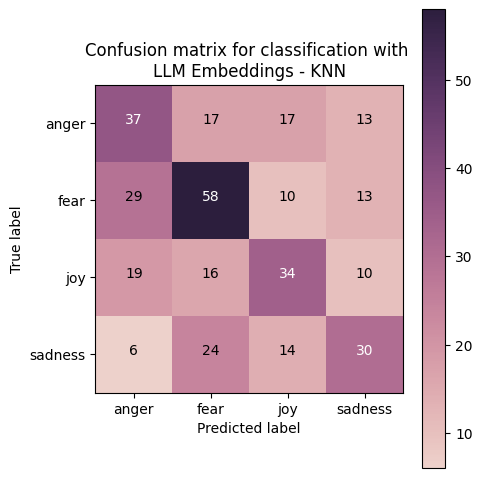

In [62]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [63]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [64]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [65]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [66]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [67]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [68]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [69]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3708 - loss: 1.3744 - val_accuracy: 0.5418 - val_loss: 1.1017
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 0.9246 - val_accuracy: 0.5504 - val_loss: 1.0795
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.6920 - val_accuracy: 0.5620 - val_loss: 1.1449
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5899 - val_accuracy: 0.5591 - val_loss: 1.2160
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.4584 - val_accuracy: 0.5908 - val_loss: 1.2837
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3601 - val_accuracy: 0.5648 - val_loss: 1.4693
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.2924 - val_accuracy: 0.5735 - val_loss: 1.4628
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9247 - loss: 0.2210 - val_accuracy: 0

In [71]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


array([[3.8791564e-01, 1.7137085e-01, 7.4864002e-03, 4.3322712e-01],
       [7.9176057e-04, 2.1050887e-03, 9.9702710e-01, 7.6026008e-05],
       [5.6091256e-05, 7.4500997e-05, 9.9977279e-01, 9.6498472e-05],
       [7.6404070e-03, 9.0297365e-01, 3.7169757e-03, 8.5668989e-02],
       [1.9334736e-01, 8.0140787e-01, 2.6673777e-04, 4.9780309e-03]],
      dtype=float32)

In [72]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'joy', 'joy', 'fear', 'fear'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [74]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.484085,1.191979,0.481268,1.287519
1,1,0.652643,0.878292,0.561960,1.071191
2,2,0.732079,0.690217,0.567723,1.058453
3,3,0.792693,0.564772,0.556196,1.278953
4,4,0.823415,0.473968,0.567723,1.322425
5,5,0.854138,0.389619,0.567723,1.488325
6,6,0.890396,0.311564,0.556196,1.533908
7,7,0.908940,0.252363,0.550432,1.688491
8,8,0.913922,0.239299,0.561960,1.674465
9,9,0.931359,0.206452,0.567723,1.877525


In [75]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.62      0.49      0.55        84
        fear       0.57      0.75      0.65       110
         joy       0.57      0.54      0.56        79
     sadness       0.52      0.43      0.47        74

    accuracy                           0.57       347
   macro avg       0.57      0.55      0.56       347
weighted avg       0.57      0.57      0.56       347



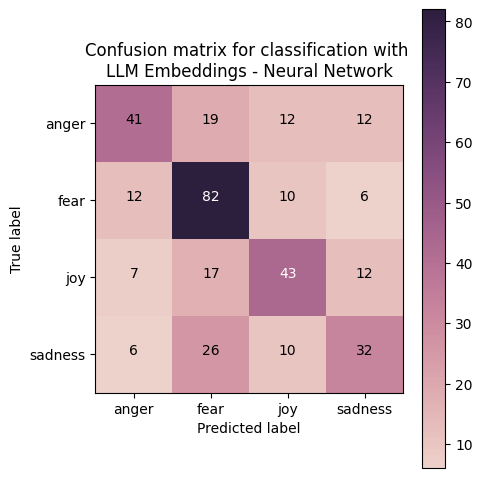

In [76]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

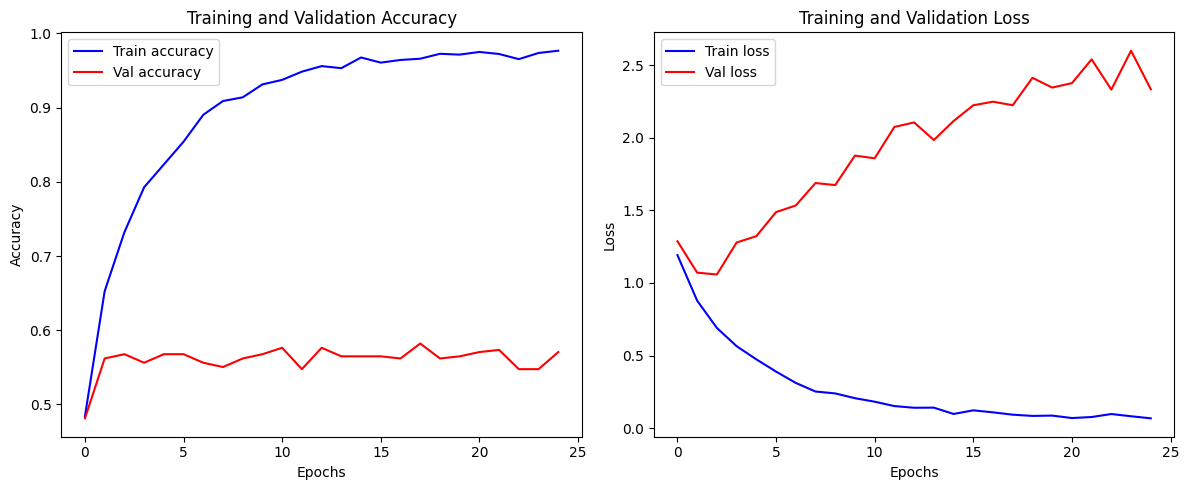

In [77]:
# Answer here
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [78]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    




time=2024-12-08T15:39:04.325Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff gpu=GPU-6e720010-5cc3-6318-a22e-e0ab75cb2662 parallel=4 available=15615524864 required="3.7 GiB"
time=2024-12-08T15:39:04.532Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="28.0 GiB" free_swap="0 B"
time=2024-12-08T15:39:04.532Z level=INFO source=memory.go:356 msg="offload to cuda" layers.requested=-1 layers.model=29 layers.offload=29 layers.split="" memory.available="[14.5 GiB]" memory.gpu_overhead="0 B" memory.required.full="3.7 GiB" memory.required.partial="3.7 GiB" memory.required.kv="896.0 MiB" memory.required.allocations="[3.7 GiB]" memory.weights.total="2.4 GiB" memory.weights.repeating="2.1 GiB" memory.weights.nonrepeating="308.2 MiB" memory.graph.full="424.0 MiB" memory.graph.partial="570.7 MiB"
time=2024-12-08T15:39:04.

[GIN] 2024/12/08 - 15:39:06 | 200 |  2.747688443s |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:06 | 200 |   71.517575ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:06 | 200 |   64.261549ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |   72.494952ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |   66.044336ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |   67.051774ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |   64.556495ms |       127.0.0.1 | POST     "/api/chat"
Invalid response: none. Asking for reclassification.
[GIN] 2024/12/08 - 15:39:07 | 200 |   68.283238ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |    66.85083ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |   73.913444ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 15:39:07 | 200 |  

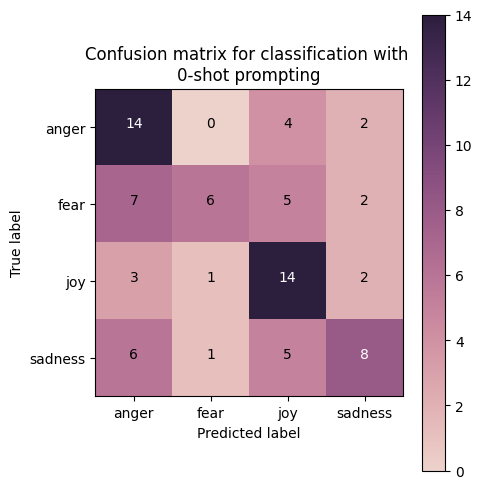

In [79]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @tmz @HarveyLevinTMZ   Hell hath no fury like a women scorned.    It's the affair.  Not the parenting
Emotion: anger

Text: We're very busy #coding a whole network manager for #unity3d based on #steamworks networking. #gamedev #indiedev #3amDeadTime #horror #game
Emotion: fear

Text: @gypsydragoness wrinkling up. 'Well now, looks here like your name starts with the letter G, eh?' The man smiled up and gave a hearty +
Emotion: joy

Text: Standard Candice starting the show with a pout #startasyoumeantogoon #GBBO
Emotion: sadness


[GIN] 2024/12/08 - 15:39:38 | 200 |  210.992869ms |       127.0.0.1 | POST     "/api/chat"
[GIN

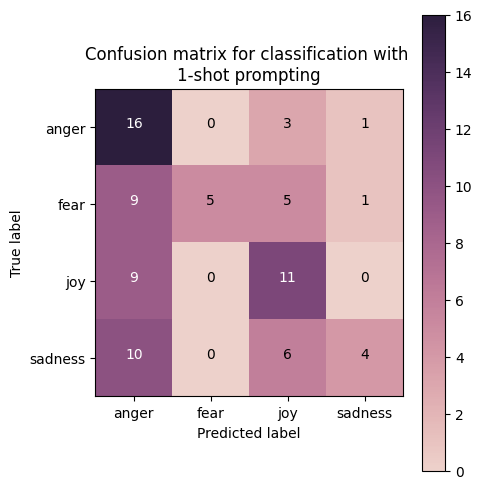

In [80]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @tmz @HarveyLevinTMZ   Hell hath no fury like a women scorned.    It's the affair.  Not the parenting
Emotion: anger

Text: Now they fret about scuffs. I’ll take scuffs (which…come in) for a phone I can use wet handed or drop in a toilet any day.
Emotion: anger

Text: Skipping meals is the national way of showing #disappointment and . #wiz
Emotion: anger

Text: I'm so annoyed/sad YouTube is burning itself to the ground 🙄🙄
Emotion: anger

Text: @CBSBigBrother never bring back Meech and Bridgette. Crying because someone looks at you? Ugh, and Bridgette. #bitter
Emotion: anger

Text: We're very busy #coding a whole network ma

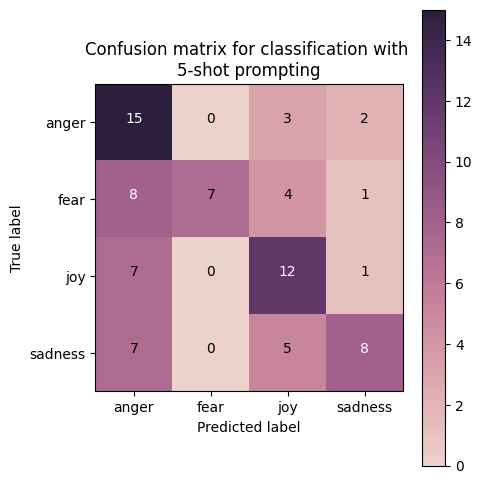

In [81]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

#### zero-shot
- accuracy: 52.5%
- perform best for "joy" and "anger" (F1-scores: 0.58 and 0.56, respectively)
- struggles with "fear" (F1-score: 0.43)
- zero-shot approach relies entirely on model pre-training, showing decent baseline performance but lacks fine-tuning for specific data characteristics

#### 1-shot
- accuracy: 45.0%
- lower accuracy compared to zero-shot
- adding just one labeled example for each class introduces noise or fails to provide meaningful improvement

#### 5-shot
- accuracy: 52.5%
- accuracy equals to zero-shot, not too much improvement
- the model begins to leverage additional examples for better generalization but still performs inconsistently across classes

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---